<a href="https://colab.research.google.com/github/varsha-0110/codebytes/blob/master/Travel_and_Tourism_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

#load datasets

destination_df = pd.read_csv("/content/Expanded_Destinations.csv")
reviews_df = pd.read_csv("/content/Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd.read_csv("/content/Final_Updated_Expanded_UserHistory.csv")
users_df = pd.read_csv("/content/Final_Updated_Expanded_Users.csv")



In [ ]:
destination_df.head()


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


DATA PREPROCESSING

We will clean and preprocess the data to make it ready for building recommendation models

In [ ]:
review_destination = pd.merge(reviews_df, destination_df, on = 'DestinationID', how = 'inner')

review_destination_userhistory = pd.merge(review_destination, userhistory_df, on = 'UserID', how = 'inner')

df = pd.merge(review_destination_userhistory, users_df, on = 'UserID', how = 'inner')

df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [ ]:
df.shape

(993, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ReviewID,0
DestinationID_x,0
UserID,0
Rating,0
ReviewText,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


VISUALIZATION

<ipython-input-13-b0eb3dd6ffee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Popularity', y = 'Name', data = destination_df.sort_values('Popularity', ascending = False), palette = 'viridis')


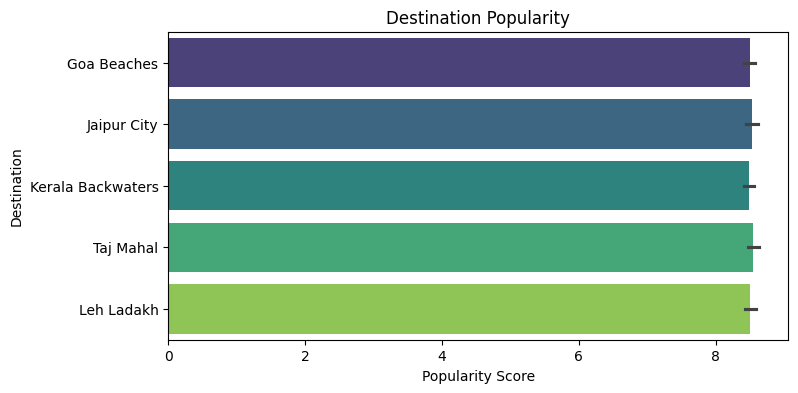

In [ ]:
# 1.destination popularity
plt.figure(figsize=(8,4))
sns.barplot(x ='Popularity', y = 'Name', data = destination_df.sort_values('Popularity', ascending = False), palette = 'viridis')
plt.title('Destination Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Destination')
plt.show()

<ipython-input-14-cd50d5f5b776>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Type', data = destination_df, order = destination_df['Type'].value_counts().index, palette = 'coolwarm')


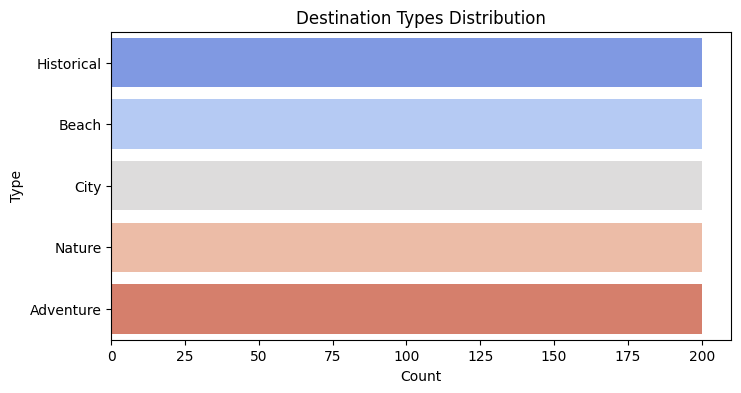

In [ ]:
#2.Destination Types Distribution

plt.figure(figsize=(8,4))
sns.countplot(y = 'Type', data = destination_df, order = destination_df['Type'].value_counts().index, palette = 'coolwarm')
plt.title('Destination Types Distribution')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()


<ipython-input-15-729642586c08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'BestTimeToVisit', data = destination_df, order = destination_df['BestTimeToVisit'].value_counts().index, palette = 'coolwarm')


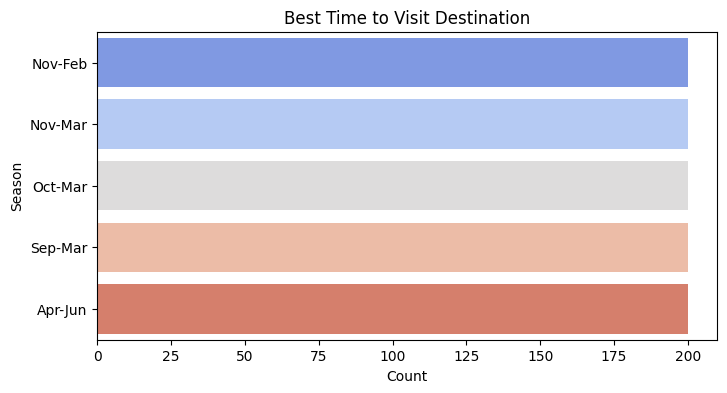

In [ ]:
#3.Best time to Visit Distribution

plt.figure(figsize=(8,4))
sns.countplot(y = 'BestTimeToVisit', data = destination_df, order = destination_df['BestTimeToVisit'].value_counts().index, palette = 'coolwarm')
plt.title('Best Time to Visit Destination')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()


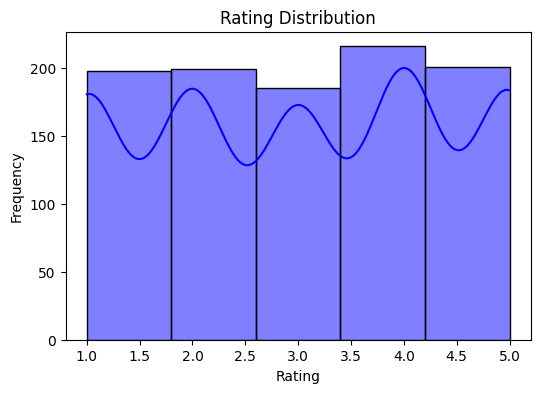

In [ ]:
#4.Rating Distribution
plt.figure(figsize=(6,4))
sns.histplot(reviews_df ['Rating'], bins = 5, kde = True, color = 'blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


CONTENT BASED RECOMMENDATION MODEL

Prepare Destination Features

We will use the "Type", "State" and "BestTimeToVisit" columns to create features for content-based filtering

In [ ]:
df['features'] = df['Type'] + ' ' + df['State'] + ' ' + df['BestTimeToVisit'] + ' ' + df['Preferences']

In [ ]:
df['features']

,features
0,"City Rajasthan Oct-Mar City, Historical"
1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,"City Rajasthan Oct-Mar Nature, Adventure"
3,"Nature Kerala Sep-Mar Nature, Adventure"
4,"City Rajasthan Oct-Mar City, Historical"
...,...
988,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')

destination_features = vectorizer.fit_transform(df['features'])

cosine_sim = cosine_similarity(destination_features, destination_features)


In [ ]:
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

Recommendation Function


In [ ]:
# Define recommendation function
def recommend_destinations(user_id, userhistory_df, destinations_df, cosine_sim):
    """
    Recommends top 5 destinations for a given user based on similarity scores.
    Args:
    - user_id: ID of the user.
    - userhistory_df: User history DataFrame containing 'UserID' and 'DestinationID'.
    - destinations_df: Destinations DataFrame containing destination details.
    - cosine_sim: Cosine similarity matrix for destinations.
    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Get the destinations the user has visited
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values

    # Calculate similarity scores for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)

    # Recommend the top 5 destinations the user hasn't visited yet
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]

    recommendations = []
    for idx in recommended_destinations_idx:
        if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
            # Append detailed information for each recommendation
            recommendations.append(destinations_df.iloc[idx][[
                'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
            ]].to_dict())
        if len(recommendations) >= 5:
            break

    # Convert recommendations to a DataFrame
    return pd.DataFrame(recommendations)
# Example: Recommend destinations for user with ID 1
recommended_destinations = recommend_destinations(1, userhistory_df, destination_df, cosine_sim)
# Display recommendations
recommended_destinations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,99,Kerala Backwaters,Kerala,Nature,8.154277,Sep-Mar
1,81,Taj Mahal,Uttar Pradesh,Historical,8.113730,Nov-Feb
2,69,Kerala Backwaters,Kerala,Nature,9.251450,Sep-Mar
3,165,Leh Ladakh,Jammu and Kashmir,Adventure,7.554650,Apr-Jun
4,481,Taj Mahal,Uttar Pradesh,Historical,8.347502,Nov-Feb


COLLABORATIVE FILTERING

In collaborative filtering, we recommend destinations based on the behavior and preferences of other similar users.

Create user item matrix

In [ ]:
# Create a user-item matrix based on user history
user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')

# Fill missing values with 0 (indicating no rating/experience)
user_item_matrix.fillna(0, inplace=True)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

Cosine Similarity Between Users

In [ ]:
# Function to recommend destinations based on user similarity
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Find similar users
    similar_users = user_similarity[user_id - 1]

    # Get the top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]

    # Get the destinations liked by similar users
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)

    # Recommend the top 5 destinations
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

    # Filter the destinations DataFrame to include detailed information
    recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
    ]]

    return recommendations

# Example: Collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(1, user_similarity, user_item_matrix, destination_df)

# Display recommendations
collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
335,336,Taj Mahal,Uttar Pradesh,Historical,9.268792,Nov-Feb
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun
878,879,Kerala Backwaters,Kerala,Nature,8.309631,Sep-Mar


User Input Feature based recommendation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the data
data = df.copy()
# Select relevant features
features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'  # Predicting popularity

# Encode categorical variables
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Split the dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.30
R² Score: 0.07


In [ ]:
import pandas as pd

# Prediction system
def recommend_destinations(user_input, model, label_encoders, features, data):
    # Encode user input
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]

    # Convert to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity


# Example user input
user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',  # This might be an unseen label
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}

# Make a prediction
predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

# Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


SAVING FILE

In [ ]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))